# CFD HW 2 -- Fourier experimentation
## Kelsey Malloy

### <i>last edited: 09/2020</i>

In [1]:
import numpy as np
import numpy.linalg as LA
import matplotlib as mpl
import matplotlib.pyplot as plt

### 3. With the donor-cell scheme

We are solving the advection equation u<sub>t</sub>+u<sub>x</sub>=0 with periodic boundary conditions on the unit interval 0≤x≤1.  The initial conditions are given by the superposition of 3 waves:
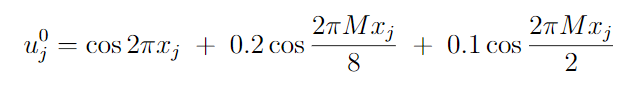
<br>where M=128 is the number of cells in an eventual discrete computational grid (use M points only by not duplicating the end node).

1. Identify the amplitudes a<sub>m</sub>, wavenumbers k<sub>m</sub>, and wavelengths λ<sub>m</sub> (m=1,2,3) of the 3 waves.

a<sub>1</sub> = 1<br>
k<sub>1</sub> = 2$\pi$<br>
λ<sub>1</sub> = 1<br><br>
a<sub>2</sub> = 0.2<br>
k<sub>2</sub> = 32$\pi$<br>
λ<sub>2</sub> = 1/16<br><br>
a<sub>3</sub> = 0.1<br>
k<sub>3</sub> = 128$\pi$<br>
λ<sub>3</sub> = 1/64<br>


2. Identify the number of cells per wavelength in each wave, and identify where they fall on the k∆x scale.  Compute also the corresponding magnitude of the amplification factor.

λ<sub>m</sub>/dx = # of waves that can fit in single gridpoint

In [2]:
xmin,xmax=0,1
nx=128
xpts = np.linspace(xmin,xmax,nx)
dx=(xmax-xmin)/nx
print(dx)

mu=0.5
periodic=1

0.0078125


In [3]:
num_waves1 = 1/dx # first wave
num_waves2 = (1/16)/dx # second wave
num_waves3 = (1/64)/dx # third wave
print('Number of waves that fit in single grid point \nFirst wave: '+str(num_waves1)+'\nSecond wave: '+str(num_waves2)+'\nThird wave: '+str(num_waves3))

Number of waves that fit in single grid point 
First wave: 128.0
Second wave: 8.0
Third wave: 2.0


In [4]:
k_dx1 = 2.*np.pi*dx
k_dx2 = 32.*np.pi*dx
k_dx3 = 128*np.pi*dx
print('k\u0394x \nFirst wave: '+str(k_dx1)+'\nSecond wave: '+str(k_dx2)+'\nThird wave: '+str(k_dx3))

kΔx 
First wave: 0.04908738521234052
Second wave: 0.7853981633974483
Third wave: 3.141592653589793


First wave is longest wave, third wave is shortest wave on the k$\Delta$x scale.

Amplifiction factor: $\sqrt{1 - \mu(1-\mu)4sin^2(k \Delta x/2)}$

In [5]:
mu = 0.5
A1 = np.sqrt(1- (mu*(1-mu)*4*(np.sin(k_dx1/2))**2))
A2 = np.sqrt(1- (mu*(1-mu)*4*(np.sin(k_dx2/2))**2))
A3 = np.sqrt(1- (mu*(1-mu)*4*(np.sin(k_dx3/2))**2))
print('Amplification factor \nFirst wave: '+str(A1)+'\nSecond wave: '+str(A2)+'\nThird wave: '+str(A3))

Amplification factor 
First wave: 0.9996988186962042
Second wave: 0.9238795325112867
Third wave: 0.0


Time update

In [6]:
def update(u,xpts,dx,mu,periodic):
    
    u[1:] = u[1:] - mu*(u[1:]-u[0:-1])
    if periodic==1:
        u[0] = u[0] - mu*(u[0]-u[-1])
    #return u

In [7]:
def plotfig(xpts,u,amps,t,color):
    # plot time update
    timestr=str(t)
    #if t==0:
    fig = plt.figure(1,figsize=[16,8])
    ax1 = fig.add_subplot(121)
    ax1.set_title('Time update with donor cell scheme')
    ax1.set_ylim([-2,2])
    ax1.plot(xpts,u,color,label='$u^{'+str(t)+'}$')
    ax1.legend(loc=1)
    
    # plot FFT
    #if t==0:
    ax2 = fig.add_subplot(122)
    ax2.set_title('FFT')
    kdx=np.pi*np.linspace(0,len(u)//2,len(u)//2)/(len(u)/2)
    ax2.plot(kdx,amps[:len(u)//2],color)
    

C:\Users\kelse\Anaconda3\envs\LB_20190503\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\kelse\Anaconda3\envs\LB_20190503\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


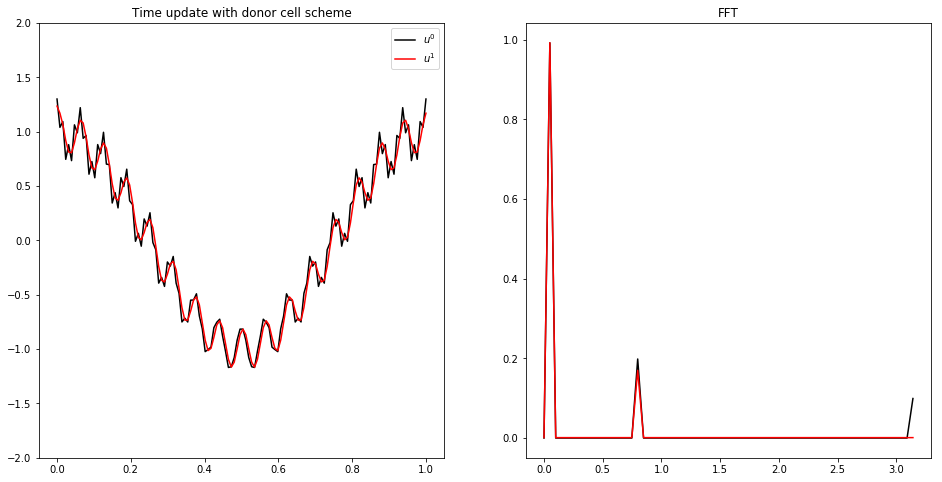

In [8]:
# initial conditions
u = np.cos(2*np.pi*xpts) + 0.2*np.cos(0.25*np.pi*nx*xpts) + 0.1*np.cos(np.pi*nx*xpts)
fft = np.fft.fft(u[0:-1])
amps = fft/(nx/2)
plotfig(xpts,u,amps,0,'k')

# 1st time update
update(u,xpts,dx,mu,periodic)
fft = np.fft.fft(u[0:-1])
amps = fft/(nx/2)
plotfig(xpts,u,amps,1,'r')


At first time update, the shortest wave gets damped out and there is a phase shift of remaining wave(s). The FFT shows this with the red line at the right hand side.

In [9]:
N = nx/mu
print(N)

256.0


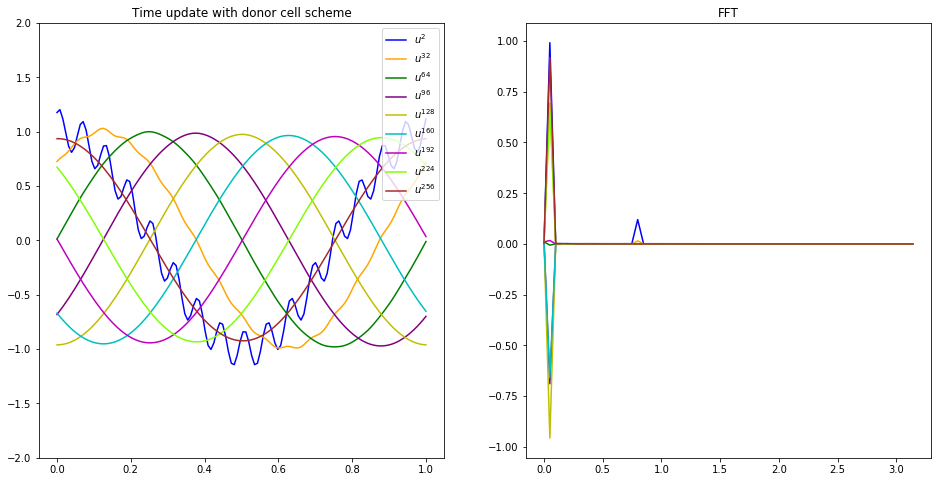

In [10]:
colors=['b','orange','green','purple','y','c','m','chartreuse','brown']
idx=0
for time in range(2,int(N)+1):
    update(u,xpts,dx,mu,periodic)
    
    if time % 32 == 0 or time==2: # only plotting u2 and every 32
        fft = np.fft.fft(u[0:-1])
        amps = fft/(nx/2)
        plotfig(xpts,u,amps,time,colors[idx])
        idx+=1

The update at time 256 is back where the initial condition's longest wave was located. The medium wave eventually gets damped out. The longest loses some of the amplitude. This follows the theoretical findings of the amplification factor where each time step should preserve ~99% of that long wave.

In [12]:
# to preserve 90% of amplitude for full cycle
new_kdx = np.arcsin((np.sqrt(0.19)))
new_kdx = new_kdx*2.
print(new_kdx)

dx = new_kdx / (2*np.pi)
print(dx)

0.9020536235925248
0.14356629312870628
